<a href="https://colab.research.google.com/github/Dznidzovic/Domaci-1-NeuroRehab/blob/main/PO_Projekat_FashionMNIST_BI_25_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importovanje Biblioteka

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
%matplotlib inline
import random
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
import itertools

import tensorflow as tf

from keras.utils.np_utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D, BatchNormalization
from keras.utils import np_utils

import cv2
import scipy

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier


# 2. Ucitavanje Podataka

In [ ]:
data = pd.read_csv('fashion-mnist_train.csv')
data.tail()
data.shape

(60000, 785)

# 3. Popunjavanje nedostajucih vrednosti

In [ ]:
data.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

Mozemo videti da nema nedostajucih vrednosti

# 4. Razdvajanje skupa podataka

In [ ]:
x,y = data.drop(['label'], axis=1 ), data['label']
x.shape, y.shape

((60000, 784), (60000,))

# 5. Vizuelizacija Klasa

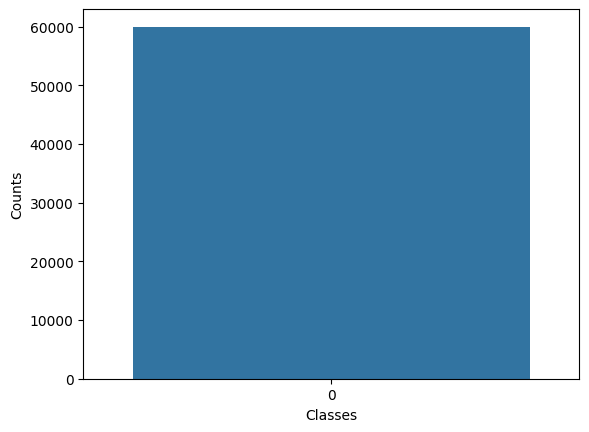

2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: label, dtype: int64

In [ ]:
sns.countplot(y)
plt.ylabel('Counts')
plt.xlabel('Classes')
plt.show()
y.value_counts()

Mozemo videti da je odnos slika razlicith klasa podjednak.

---





# 6. Obrada Podataka

In [ ]:
x.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,14.488767,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,38.334549,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


Mozemo videti da nijedna vrednost nije manja od 0 ili veca od 255. Podelicemo celu bazu sa 255 i tako normalizovati podatke, gde ce sve vrednosti biti izmedju 0 i 1.

In [ ]:
x = x/255

# 7. Vizuelizacija podataka

U ovoj bazi podataka, razliciti komadi odece su predstavljeni sledecim brojevima: 
0 = majica
1 = pantalone
2 = dzemper
3 = haljina
4 = kaput
5 = sandale
6 = kosulja
7 = patike
8 = torba
9 = cizme

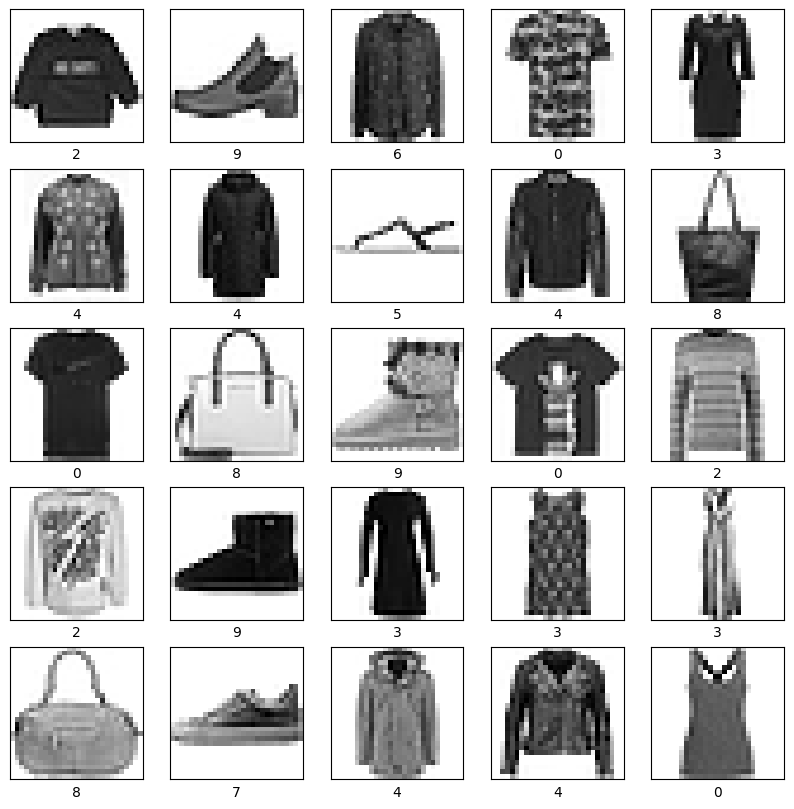

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.array(x.iloc[i]).reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(y[i])
plt.show()

# 8. Podela na skupove za trening i validaciju

Kako su nam fajlovi vec podeljeni na test i train, a za procenjivanje svakog modela ce se koristiti GridSearchCv koji automatski deli train podatke na train i validation skupove, nema potrebe rucno raditi bilo sta od toga

# 9. Modeli

9.1 Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(n_estimators=100)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(x, y)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best parameters:  {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best score:  0.8826166666666667


9.2 LDA Random Forest Clasifier

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

lda = LinearDiscriminantAnalysis(n_components=9)
X_train_lda = lda.fit_transform(x, y)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train_lda, y)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Best score:  0.8498833333333333


9.3 KNN LDA

In [ ]:

knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [1, 5, 10],
    'weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)
grid_search.fit(X_train_lda, y)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'n_neighbors': 10, 'weights': 'distance'}
Best score:  0.8454


9.4 KNN

In [ ]:
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [1, 5, 10],
    'weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)
grid_search.fit(x, y)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best parameters:  {'n_neighbors': 5, 'weights': 'distance'}
Best score:  0.8550000000000001


9.5 MLP

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)


In [ ]:
def create_model(input_shape):
    model = Sequential()
    model.add(Dense(100, input_dim=input_shape, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
x.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
performance_accuracy = []

for fold_count, (train_index, test_index) in enumerate(kfold.split(x, y)):
    print('fold '+str(fold_count+1)+': ')
    print('-- training --')
    X_kfold_train, y_kfold_train = x.iloc[train_index], y[train_index]
    X_kfold_test, y_kfold_test = x.iloc[test_index], y[test_index]
    Y_kfold_train = np_utils.to_categorical(y_kfold_train, 10)
    Y_kfold_test = np_utils.to_categorical(y_kfold_test, 10)
    
    model = create_model(X_kfold_train.shape[1])
    
    model.fit(X_kfold_train, Y_kfold_train, epochs=10, batch_size=128, verbose=1)
    
    y_kfold_pred_prob = model.predict(X_kfold_test)
    y_kfold_pred = np.argmax(y_kfold_pred_prob, axis=1)

    perf = accuracy_score(y_kfold_test, y_kfold_pred, normalize=True)
    performance_accuracy.append(perf)
    print('Accuracy:', perf)

print('Mean accuracy:', np.mean(performance_accuracy))






fold 1: 
-- training --
Epoch 1/10
375/375 [==============================] - 7s 4ms/step - loss: 0.7576 - accuracy: 0.7334
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.4867 - accuracy: 0.8281
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.4350 - accuracy: 0.8452
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.4092 - accuracy: 0.8541
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3876 - accuracy: 0.8617
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3735 - accuracy: 0.8649
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3629 - accuracy: 0.8685
Epoch 8/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3465 - accuracy: 0.8766
Epoch 9/10
375/375 [==============================] - 1s 4ms/step - loss: 0.3408 - accuracy: 0.8762
Epoch 10/10
375/375 [==============================] - 1s 2ms/step
Accuracy:

9.6 LDA MLP

In [ ]:
x.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)
lda = LinearDiscriminantAnalysis(n_components=9)
X_train_lda = lda.fit_transform(x, y)


In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for fold_count, (train_index, test_index) in enumerate(kfold.split(x, y)):
    print('fold '+str(fold_count+1)+': ')
    print('-- training --')
    X_kfold_train, y_kfold_train = X_train_lda[train_index], y[train_index]
    X_kfold_test, y_kfold_test = X_train_lda[test_index], y[test_index]
    Y_kfold_train = np_utils.to_categorical(y_kfold_train, 10)
    Y_kfold_test = np_utils.to_categorical(y_kfold_test, 10)
    
    model = create_model(X_kfold_train.shape[1])
    
    model.fit(X_kfold_train, Y_kfold_train, epochs=10, batch_size=128, verbose=1)
    
    y_kfold_pred_prob = model.predict(X_kfold_test)
    y_kfold_pred = np.argmax(y_kfold_pred_prob, axis=1)
    
    perf = accuracy_score(y_kfold_test, y_kfold_pred, normalize=True)
    performance_accuracy.append(perf)
    print('Accuracy:', perf)


fold 1: 
-- training --
Epoch 1/10
375/375 [==============================] - 2s 3ms/step - loss: 0.6779 - accuracy: 0.7854
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.4977 - accuracy: 0.8292
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.4829 - accuracy: 0.8315
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.4727 - accuracy: 0.8343
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.4645 - accuracy: 0.8370
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.4616 - accuracy: 0.8369
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.4579 - accuracy: 0.8394
Epoch 8/10
375/375 [==============================] - 1s 3ms/step - loss: 0.4522 - accuracy: 0.8408
Epoch 9/10
375/375 [==============================] - 1s 3ms/step - loss: 0.4498 - accuracy: 0.8415
Epoch 10/10
375/375 [==============================] - 1s 1ms/step
Accuracy:

# 10. Rezultati

Random Forest sa sledecim parametrima je imao najbolji ucinak:'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200, njega cemo istrenirati na celom trening skupu i testirati.

In [ ]:
test_data = pd.read_csv('fashion-mnist_test.csv')
test_data.tail()
test_data.shape

X_test, Y_test = test_data.drop(['label'], axis=1 ), test_data['label']
X_test.shape, Y_test.shape

((10000, 784), (10000,))

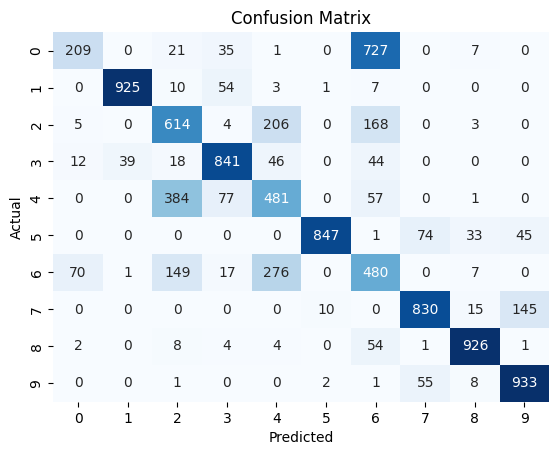

Accuracy: 0.71
Precision: 0.74
Recall: 0.71
F1-score: 0.71


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

final_model = RandomForestClassifier(max_depth = None, min_samples_split = 5, n_estimators = 200)
final_model.fit(x,y)
y_score = final_model.score(X_test, Y_test)
y_pred = final_model.predict(X_test)

cm = confusion_matrix(Y_test, y_pred)

sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred, average='weighted')
recall = recall_score(Y_test, y_pred, average='weighted')
f1score = f1_score(Y_test, y_pred, average='weighted')

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1score))
